<a href="https://colab.research.google.com/github/hanafimajid/tpot-mtr/blob/main/edm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tpot
import pandas as pd


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=3e7519ac2fafa8d285facfdd5b01296d7f32b9375f665730f43aa59da1cbde12
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
from tpot import TPOTRegressor

In [ ]:
#importing data from a local CSV file
from google.colab import files
uploaded = files.upload()


Saving edm.csv to edm.csv


In [ ]:
import pandas as pd
df = pd.read_csv("edm.csv")
df.head()
y_col = [
'DFlow ',
' DGap '

]
y = df[y_col]
#x_col_id = ['id']
#x_id = df[x_col_id]
y.head()
#X_col = ['Xloc','Yloc','Cr','Ni','Zn','Co']
#X = df[X_col]
#X = df[df.columns.drop(y)]
#X=df.drop(columns=['id'])
X=df[df.columns.drop(y)]
#X=df.drop(y,x_id)
y.head()


,DFlow,DGap
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0


In [ ]:
X

,ASM_A_MeanT,ASD_A_SDevT,BSM_B_MeanT,BSD_B_SDevT,CSM_C_MeanT,CSD_C_SDevT,ISM_I_MeanT,ISD_I_SDevT,ALM_A_MeanT,ALD_A_SDevT,BLM_B_MeanT,BLD_B_SDevT,CLM_C_MeanT,CLD_C_SDevT,ILM_I_MeanT,ILD_I_SDevT
0,-4.86,0.04,0.33,0.13,5.83,0.15,0.97,0.03,-4.85,0.15,0.27,0.16,5.67,0.36,1.07,0.39
1,-4.86,0.04,0.33,0.13,5.83,0.15,0.97,0.03,-4.85,0.15,0.27,0.16,5.67,0.36,1.07,0.39
2,-4.86,0.04,0.33,0.13,5.83,0.15,0.97,0.03,-4.85,0.15,0.27,0.16,5.67,0.36,1.07,0.39
3,-4.68,0.10,0.59,0.17,5.56,0.14,1.82,0.34,-4.75,0.13,0.43,0.19,5.73,0.21,1.38,0.41
4,-4.68,0.10,0.59,0.17,5.56,0.14,1.82,0.34,-4.75,0.13,0.43,0.19,5.73,0.21,1.38,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,-4.64,0.01,1.12,0.01,5.17,0.06,2.84,0.07,-4.65,0.08,0.98,0.28,5.29,0.27,2.49,0.53
150,-4.63,0.01,1.13,0.00,5.13,0.01,2.73,0.01,-4.63,0.01,1.13,0.00,5.14,0.02,2.69,0.09
151,-4.62,0.01,1.13,0.00,5.12,0.00,2.51,0.02,-4.63,0.01,1.13,0.00,5.12,0.01,2.61,0.10
152,-4.63,0.01,1.13,0.00,5.29,0.06,2.77,0.00,-4.61,0.02,1.09,0.09,5.34,0.18,2.75,0.10


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.20, random_state = 123)

from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import TransformedTargetRegressor

# Initialize the scaler
scaler=MinMaxScaler(feature_range=(0,1))

# Choose a transformer for the target variable (e.g., StandardScaler)
target_transformer = scaler





In [ ]:
y_train

,DFlow,DGap
60,0,-1
4,1,0
87,0,-1
140,0,0
29,0,1
...,...,...
17,1,0
98,0,0
66,0,0
126,0,-1


In [ ]:
X_train

array([[0.5862069 , 0.02564103, 0.99090909, ..., 0.21621622, 0.78488372,
        0.36263736],
       [0.48275862, 0.25641026, 0.5       , ..., 0.56756757, 0.18023256,
        0.41758242],
       [0.55172414, 0.02564103, 0.99090909, ..., 0.89189189, 0.79651163,
        0.31868132],
       ...,
       [0.55172414, 0.02564103, 0.99090909, ..., 0.64864865, 0.83139535,
        0.59340659],
       [0.51724138, 0.05128205, 0.99090909, ..., 0.02702703, 0.89534884,
        0.03296703],
       [0.55172414, 0.        , 0.99090909, ..., 0.86486486, 0.70348837,
        0.50549451]])

In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
#rfg = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,criterion='squared_error'))
rfg = MultiOutputRegressor(TPOTRegressor(generations=5, population_size=50,verbosity=2, random_state=123,n_jobs=1, max_time_mins=None, max_eval_time_mins=5, cv=10, scoring='neg_mean_squared_error'))
# Create a TransformedTargetRegressor
model = TransformedTargetRegressor(regressor=rfg, transformer=target_transformer)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)





Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.01741777206692658

Generation 2 - Current best internal CV score: -0.01644595685365531

Generation 3 - Current best internal CV score: -0.01644595685365531

Generation 4 - Current best internal CV score: -0.015779153970797728

Generation 5 - Current best internal CV score: -0.015766089596688036

Best pipeline: RandomForestRegressor(StandardScaler(input_matrix), bootstrap=False, max_features=0.25, min_samples_leaf=1, min_samples_split=7, n_estimators=100)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.04149554093569892

Generation 2 - Current best internal CV score: -0.0408948903666334

Generation 3 - Current best internal CV score: -0.0408948903666334

Generation 4 - Current best internal CV score: -0.03978329440046805

Generation 5 - Current best internal CV score: -0.03978329440046805

Best pipeline: DecisionTreeRegressor(StandardScaler(input_matrix), max_depth=3, min_samples_leaf=4, min_samples_split=20)


0.3909243999189576

In [ ]:
import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rmse1=math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE  is',rmse1)
mae1=mean_absolute_error(y_test, y_pred)
print('MAE is',mae1)




# Calculate RMSE for each output
rmse_per_output = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)


def relative_root_mean_squared_error(true, pred):
    n = len(true) # update
    num = np.sum(np.square(true - pred)) / n  # update
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss


rrmse2=relative_root_mean_squared_error(y_test,y_pred)
arrmse2=np.mean(rrmse2)
percentage_average_relative_rmse2 = arrmse2 * 100
print("arrmse =", arrmse2)
print(f"Percentage arrmse = {percentage_average_relative_rmse2:.2f}%")

RMSE  is 0.4350758563630568
MAE is 0.28323650483327906
rmse_per_output: [0.27470194 0.55056412]
arrmse = 0.109832155262399
Percentage arrmse = 10.98%


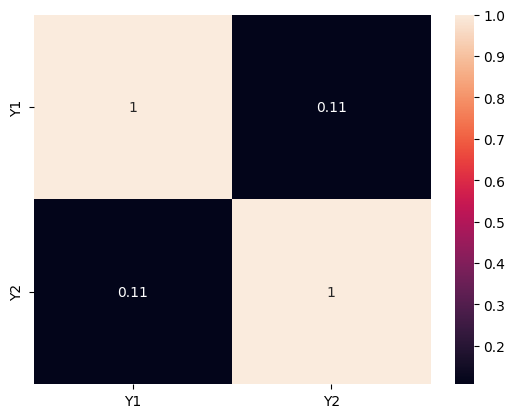

In [ ]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(y_pred)
#df_small = y_test.iloc[:,:3]
features=['Y1','Y2']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import RegressorChain
reg = LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=2, random_state=None, max_iter=1000)
chain = RegressorChain(base_estimator=reg, order=[0,1]).fit(X_train, y_train)
# Create a TransformedTargetRegressor
model = TransformedTargetRegressor(regressor=chain, transformer=target_transformer)
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)
model.score(X_test, y_test)

[LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.10770539243801891

In [ ]:
import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rmse2=math.sqrt(mean_squared_error(y_test, y_pred2))
print('RMSE  is',rmse2)
mae2=mean_absolute_error(y_test, y_pred2)
print('MAE is',mae2)




# Calculate RMSE for each output
rmse_per_output = np.sqrt(mean_squared_error(y_test, y_pred2, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)


def relative_root_mean_squared_error(true, pred):
    n = len(true) # update
    num = np.sum(np.square(true - pred)) / n  # update
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss


rrmse2=relative_root_mean_squared_error(y_test,y_pred2)
arrmse2=np.mean(rrmse2)
percentage_average_relative_rmse2 = arrmse2 * 100
print("arrmse =", arrmse2)
print(f"Percentage arrmse = {percentage_average_relative_rmse2:.2f}%")

RMSE  is 0.49407909351132184
MAE is 0.35943580240332984
rmse_per_output: [0.40933491 0.56628017]
arrmse = 0.1545855122299045
Percentage arrmse = 15.46%


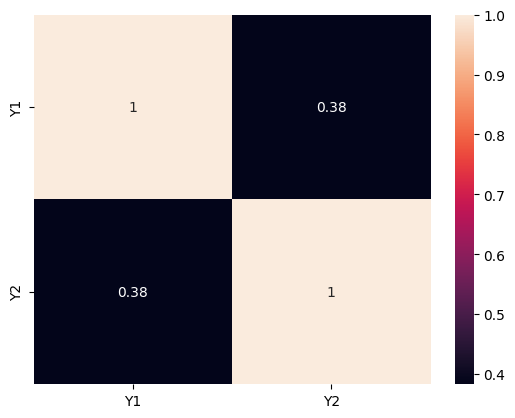

In [ ]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(y_pred2)
#df_small = y_test.iloc[:,:3]
features=['Y1','Y2']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.20, random_state = 123)

from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import TransformedTargetRegressor

# Initialize the scaler
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
from sklearn.svm import LinearSVR
class MultiOutputTP(object):
  def __init__(self, *args, **kwargs):
    self.args = args
    self.kwargs = kwargs
  def fit(self, X, y):
    X, y = map(np.atleast_2d, (X, y))
    assert X.shape[0] == y.shape[0]
    yy = y.shape[1]
    self.regs = []
    for i in range(yy):
#while i <= Ny:
      #reg = TPOTRegressor(scorers='neg_mean_squared_error',max_eval_time_seconds=240,  verbose=2, cross_val_predict_cv=10, preprocessing=False )
      #reg = LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=1, random_state=123, max_iter=10000)
      reg = TPOTRegressor(generations=5, population_size=50,verbosity=2, random_state=123,n_jobs=1, max_time_mins=None, max_eval_time_mins=5, cv=10,scoring='neg_mean_squared_error')
      Xi = np.column_stack([X, y[:, :i]])
      yi = y[:, i]
      self.regs.append(reg.fit(Xi, yi))


    return self
  def predict(self, X):
    y = np.empty([X.shape[0], len(self.regs)])
    for i, reg in enumerate(self.regs):
      y[:, i] = reg.predict(np.column_stack([X, y[:, :i]]))
    return y


In [ ]:
import numpy as np
#from tpot import decorators
#decorators.MAX_EVAL_SECS = 240
reg2 = MultiOutputTP(1).fit(X_train, y_train)
#X = np.dtype('float64')



Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.06578381074706656

Generation 2 - Current best internal CV score: -0.0655763567175992

Generation 3 - Current best internal CV score: -0.0655763567175992

Generation 4 - Current best internal CV score: -0.0655763567175992

Generation 5 - Current best internal CV score: -0.06456534853093275

Best pipeline: XGBRegressor(MinMaxScaler(MaxAbsScaler(input_matrix)), learning_rate=0.1, max_depth=10, min_child_weight=8, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.7500000000000001, verbosity=0)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.14619594596370244

Generation 2 - Current best internal CV score: -0.14619594596370244

Generation 3 - Current best internal CV score: -0.14619594596370244

Generation 4 - Current best internal CV score: -0.14612184831299818

Generation 5 - Current best internal CV score: -0.14612184831299818

Best pipeline: AdaBoostRegressor(input_matrix, learning_rate=0.1, loss=square, n_estimators=100)


In [ ]:
Ypred2 = reg2.predict(X_test)
from sklearn.metrics import r2_score
r2 = np.abs(r2_score(y_test, Ypred2))
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.38880496676666715


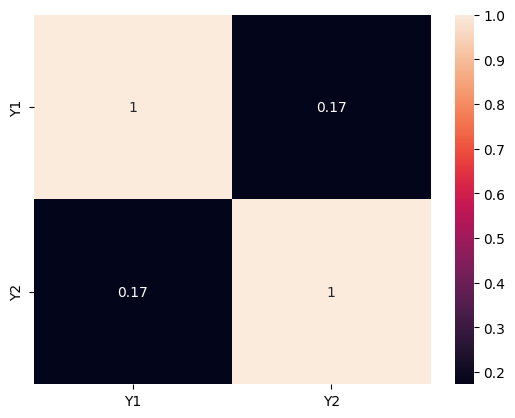

In [ ]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(Ypred2)
#df_small = y_test.iloc[:,:3]
features=['Y1','Y2']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [ ]:
import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rmse3=math.sqrt(mean_squared_error(y_test, Ypred2))
print('RMSE  is',rmse3)
mae3=mean_absolute_error(y_test, Ypred2)
print('MAE  is',mae3)




# Calculate RMSE for each output
rmse_per_output = np.sqrt(mean_squared_error(y_test, Ypred2, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)

def relative_root_mean_squared_error(true, pred):
    n = len(true) # update
    num = np.sum(np.square(true - pred)) / n  # update
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss


rrmse3=relative_root_mean_squared_error(y_test,Ypred2)
arrmse3=np.mean(rrmse3)
percentage_average_relative_rmse3 = arrmse3 * 100
print("relative_root_mean_squared_error =", rrmse3)
print("arrmse =", arrmse3)
print(f"Percentage arrmse = {percentage_average_relative_rmse3:.2f}%")

RMSE  is 0.4189553529068347
MAE  is 0.29928839495922666
rmse_per_output: [0.31701077 0.50055104]
relative_root_mean_squared_error = DFlow     0.098144
 DGap     0.154966
dtype: float64
arrmse = 0.1265549110442708
Percentage arrmse = 12.66%
